In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

## you can't have dictionary that maps continuous values as keys so we have to convert continuos values into discrete ones.we
## Going to use numpy for that.Particular two separate functions that us called linspace() creates a linear space where you
## Specify two end points and number of buckets you want and it will create a set of buckets within that interval so you can
## take an observation and place one of those buckets.That will convert a continuous number into discrete one.
## The inverse function of that is digitized anf that actually does that operation where it takes buckets and observations 
## and tells which bucket that observation fall into.

In [2]:
position_space = np.linspace(-1.2, 0.6, 20)   ## 20 Buckets
velocity_space = np.linspace(-0.07, 0.07, 20) ## 20 Buckets



In [3]:
## Now we will create Inverse Function that takes an observation and returns a state.

def get_state(observation):
    position, velocity = observation
    position_bin = np.digitize(position, position_space)
    velocity_bin = np.digitize(velocity, velocity_space)
    
    return (position_bin, velocity_bin)
## We send an observation which is list two numbers that are continuous and we end up with two integers on the output.

Episode  1000 Score  -200.0 epsilon %.3f 0.95999999999996
Episode  2000 Score  -200.0 epsilon %.3f 0.91999999999992
Episode  3000 Score  -200.0 epsilon %.3f 0.87999999999988
Episode  4000 Score  -200.0 epsilon %.3f 0.83999999999984
Episode  5000 Score  -200.0 epsilon %.3f 0.7999999999998
Episode  6000 Score  -200.0 epsilon %.3f 0.75999999999976
Episode  7000 Score  -200.0 epsilon %.3f 0.71999999999972
Episode  8000 Score  -200.0 epsilon %.3f 0.67999999999968
Episode  9000 Score  -200.0 epsilon %.3f 0.63999999999964
Episode  10000 Score  -200.0 epsilon %.3f 0.5999999999996
Episode  11000 Score  -200.0 epsilon %.3f 0.55999999999956
Episode  12000 Score  -200.0 epsilon %.3f 0.51999999999952
Episode  13000 Score  -200.0 epsilon %.3f 0.47999999999950776
Episode  14000 Score  -200.0 epsilon %.3f 0.4399999999995233
Episode  15000 Score  -200.0 epsilon %.3f 0.3999999999995388
Episode  16000 Score  -200.0 epsilon %.3f 0.3599999999995543
Episode  17000 Score  -200.0 epsilon %.3f 0.31999999999956

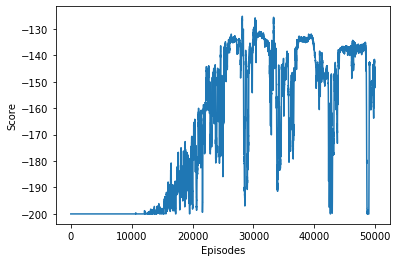

In [4]:
## Now we are going to make maxAction Function, we need to do this because numpy arc max function would not do precisely
## what we want because we are dealing with dictionary

def max_action(Q, state, actions = [0,1,2]):            ## we have to go from dictionary to numpy array. we use this function
    values = np.array([Q[state, a] for a in actions])   ## for both epsilon greedy action selection and for updating ourestimate
    action = np.argmax(values)                          ## for the Q-Table 
    return action
    


## Now we're gonna test our above Functions
if "_name_ == _main_":
    env=gym.make('MountainCar-v0')
    ## HyperParameters
    alpha = 0.1
    gamma = 0.99
    eps = 1
    n_games = 50000
    states = []
    for position in range(21):
        for velocity in range(21):
            states.append((position, velocity))
    Q = {}
    for state in states:
        for action in [0,1,2]:
            Q[state, action] = 0
    
    
    score = 0
    total_rewards = np.zeros(n_games)
    for i in range(n_games):
        done = False
        obs = env.reset()
        state = get_state(obs)
        if i%1000 == 0 and i > 0:
            print('Episode ', i, 'Score ', score, 'epsilon %.3f', eps)
        score = 0
        while not done:
            action = np.random.choice([0,1,2]) if np.random.random() < eps else max_action(Q, state) 
                                                                                  ## We want random number and we want random action if that random number is less than epsilon
            obs_, reward, done, info = env.step(action)  ## Otherwise you want to take max_action
            state_ = get_state(obs_)
            score += reward
            action_ = max_action(Q, state_)
            Q[state, action] = Q[state, action] + alpha*(reward + gamma*Q[state_,action_] - Q[state,action])
            state = state_
        total_rewards[i] = score
        eps = eps - 2/n_games if eps > 0.01 else 0.01   ## Reducing Epsilon by the time
    
    mean_rewards = np.zeros(n_games)
    for t in range(n_games):
        mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])
    plt.plot(mean_rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Score')
    plt.savefig('mountainCar.png')